In [3]:
import pandas as pd
import numpy as np

In [66]:
df=pd.read_csv(r"D:\data\DATA\BIA\synthetic_fraud_dataset.csv")
df

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,TXN_11284,USER_4796,45.05,Online,2023-01-29 18:38:00,76960.11,Mobile,Tokyo,Clothing,0,...,2,389.00,3,Amex,98,1537.54,PIN,0.1493,1,0
49996,TXN_44732,USER_1171,126.15,POS,2023-05-09 08:55:00,28791.75,Mobile,Tokyo,Clothing,0,...,13,434.95,4,Visa,93,2555.72,Biometric,0.3653,0,1
49997,TXN_38158,USER_2510,72.02,Online,2023-01-30 19:32:00,29916.41,Laptop,Mumbai,Clothing,0,...,1,369.15,2,Visa,114,4686.59,Biometric,0.5195,0,0
49998,TXN_860,USER_2248,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,Mobile,Tokyo,Electronics,0,...,13,242.29,4,Discover,72,4886.92,Biometric,0.7063,0,1


In [10]:
df.isnull().sum()

Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [43]:
import pandas as pd

# Try to convert all columns to numeric where possible
df = df.apply(pd.to_numeric, errors='ignore')

print(df.dtypes)


Transaction_ID                   object
User_ID                          object
Transaction_Amount              float64
Transaction_Type                 object
Timestamp                        object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                   int64
Previous_Fraudulent_Activity      int64
Daily_Transaction_Count           int64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d       int64
Card_Type                        object
Card_Age                          int64
Transaction_Distance            float64
Authentication_Method            object
Risk_Score                      float64
Is_Weekend                        int64
Fraud_Label                       int64
dtype: object


C:\Users\Admin\AppData\Local\Temp\ipykernel_12016\1623092805.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [11]:
df

,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,Online,2023-01-29 18:38:00,76960.11,Mobile,Tokyo,Clothing,0,0,2,389.00,3,Amex,98,1537.54,PIN,0.1493,1,0
49996,126.15,POS,2023-05-09 08:55:00,28791.75,Mobile,Tokyo,Clothing,0,0,13,434.95,4,Visa,93,2555.72,Biometric,0.3653,0,1
49997,72.02,Online,2023-01-30 19:32:00,29916.41,Laptop,Mumbai,Clothing,0,1,1,369.15,2,Visa,114,4686.59,Biometric,0.5195,0,0
49998,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,Mobile,Tokyo,Electronics,0,0,13,242.29,4,Discover,72,4886.92,Biometric,0.7063,0,1


In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],errors='coerce')

In [7]:
df['year']=df['Timestamp'].dt.year

In [8]:
df['month'] =df['Timestamp'].dt.month

In [9]:
df['day'] =df['Timestamp'].dt.day
df['day_of_week'] = df['Timestamp'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)

In [10]:
df['hour'] = df['Timestamp'].dt.hour

df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)

In [11]:
df.describe()

,Transaction_Amount,Timestamp,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,...,Is_Weekend,Fraud_Label,year,month,day,day_of_week,is_weekend,hour,sin_hour,cos_hour
count,50000.000000,50000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04
mean,99.411012,2023-07-02 12:47:11.063999744,50294.065981,0.05020,0.098400,7.485240,255.271924,2.003540,119.999940,2499.164155,...,0.299640,0.321340,2023.0,6.527080,15.719320,3.016660,0.289660,11.516380,-0.004596,-4.765944e-03
min,0.000000,2023-01-01 00:01:00,500.480000,0.00000,0.000000,1.000000,10.000000,0.000000,1.000000,0.250000,...,0.000000,0.000000,2023.0,1.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000e+00
25%,28.677500,2023-04-02 03:35:30,25355.995000,0.00000,0.000000,4.000000,132.087500,1.000000,60.000000,1256.497500,...,0.000000,0.000000,2023.0,4.000000,8.000000,1.000000,0.000000,6.000000,-0.707107,-7.071068e-01
50%,69.660000,2023-07-02 14:00:00,50384.430000,0.00000,0.000000,7.000000,256.085000,2.000000,120.000000,2490.785000,...,0.000000,0.000000,2023.0,7.000000,16.000000,3.000000,0.000000,12.000000,0.000000,-1.836970e-16
75%,138.852500,2023-10-01 07:13:00,75115.135000,0.00000,0.000000,11.000000,378.032500,3.000000,180.000000,3746.395000,...,1.000000,1.000000,2023.0,10.000000,23.000000,5.000000,1.000000,17.000000,0.707107,7.071068e-01
max,1174.140000,2023-12-31 23:50:00,99998.310000,1.00000,1.000000,14.000000,500.000000,4.000000,239.000000,4999.930000,...,1.000000,1.000000,2023.0,12.000000,31.000000,6.000000,1.000000,23.000000,1.000000,1.000000e+00
std,98.687292,NaN,28760.458557,0.21836,0.297858,4.039637,141.382279,1.414273,68.985817,1442.013834,...,0.458105,0.466996,0.0,3.446364,8.804097,2.001165,0.453609,6.902383,0.706717,7.074798e-01


In [45]:
      
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [76]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Transaction_Amount              50000 non-null  float64       
 1   Timestamp                       50000 non-null  datetime64[ns]
 2   Account_Balance                 50000 non-null  float64       
 3   IP_Address_Flag                 50000 non-null  int64         
 4   Previous_Fraudulent_Activity    50000 non-null  int64         
 5   Daily_Transaction_Count         50000 non-null  int64         
 6   Avg_Transaction_Amount_7d       50000 non-null  float64       
 7   Failed_Transaction_Count_7d     50000 non-null  int64         
 8   Card_Age                        50000 non-null  int64         
 9   Transaction_Distance            50000 non-null  float64       
 10  Risk_Score                      50000 non-null  float64       
 11  Is

Fraud_Label
0    67.866
1    32.134
Name: proportion, dtype: float64


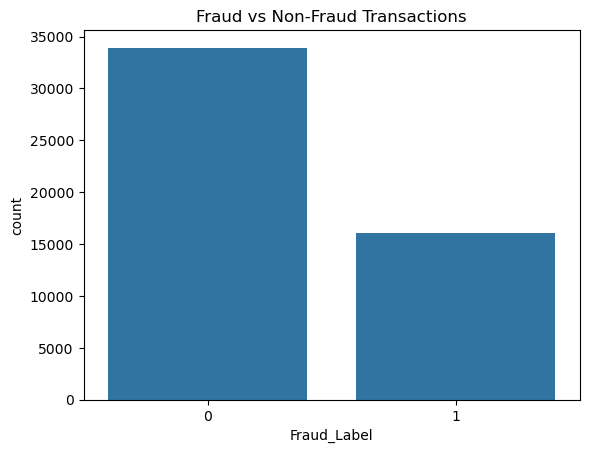

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df['Fraud_Label'].value_counts(normalize=True)*100)


sns.countplot(x='Fraud_Label', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()


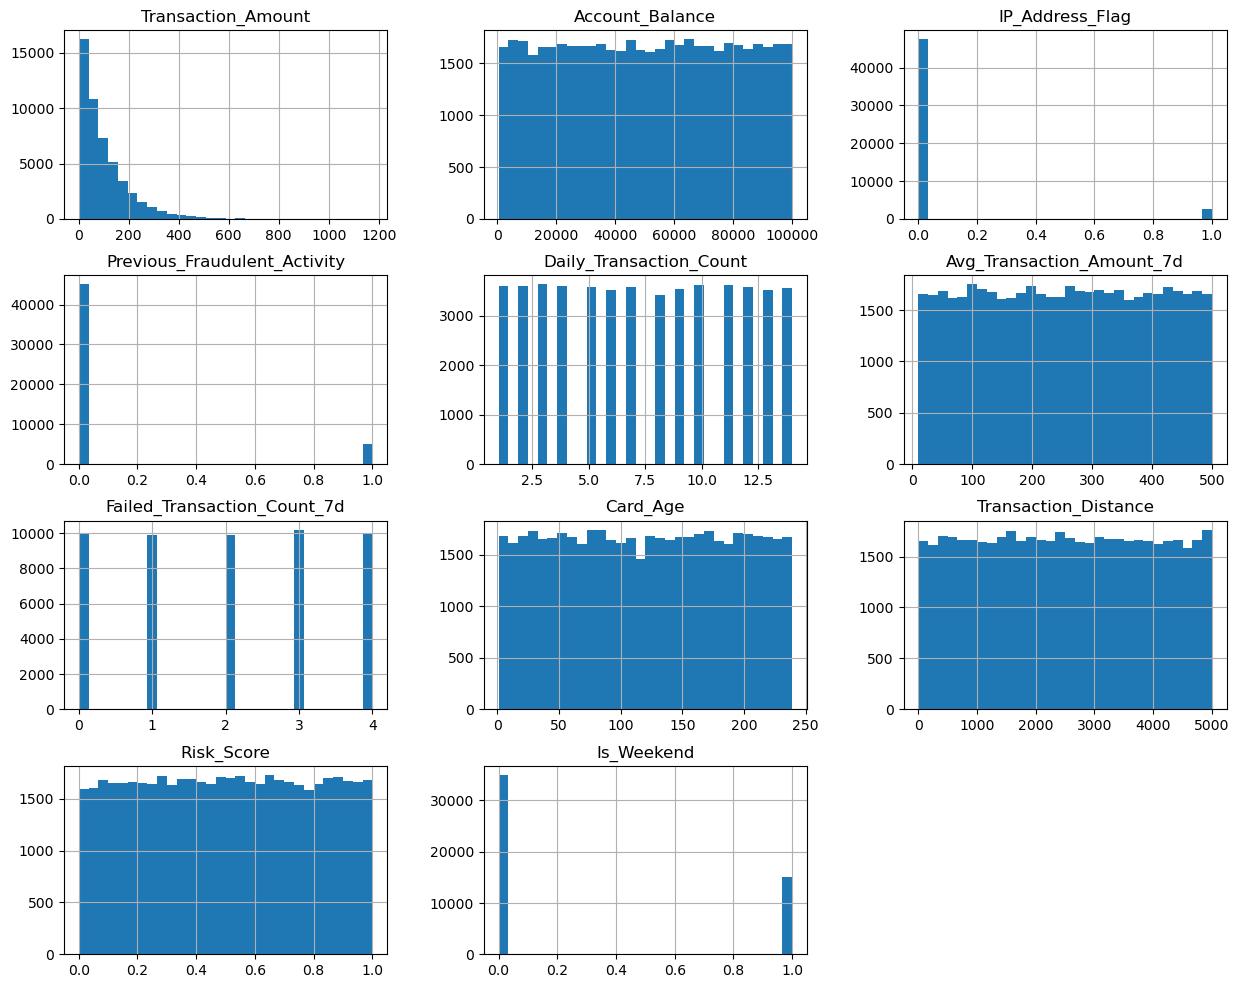

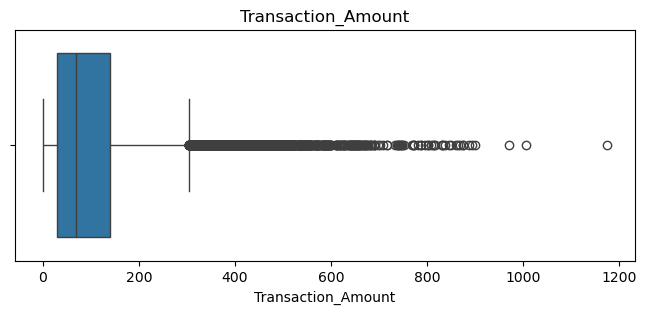

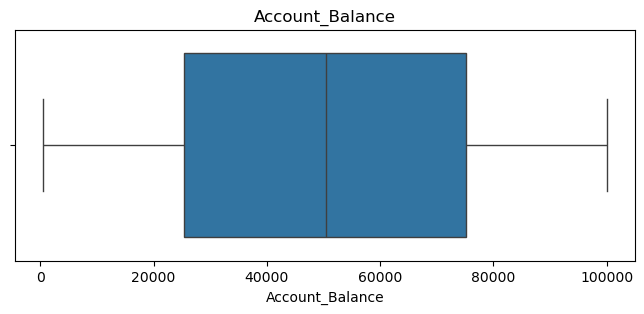

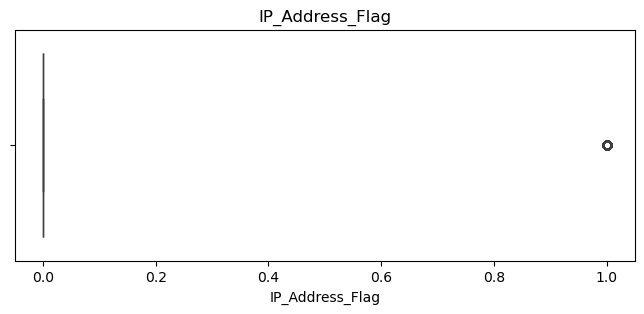

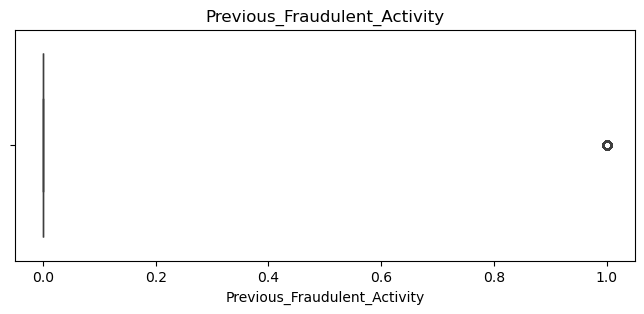

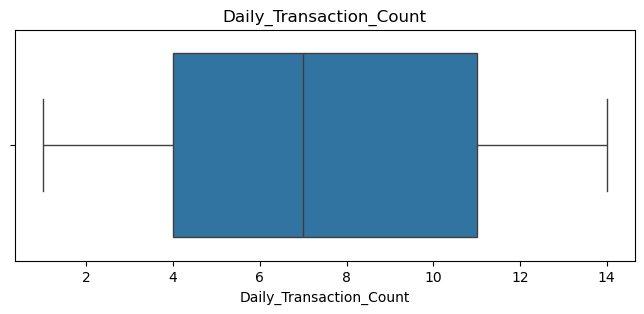

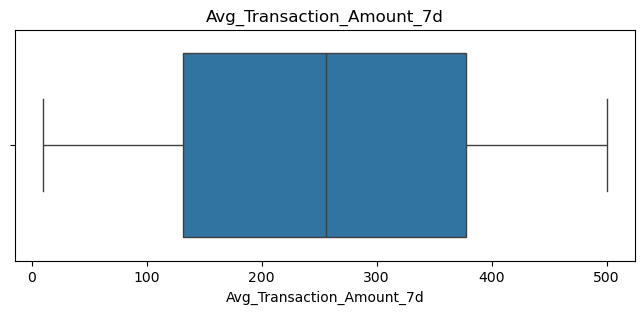

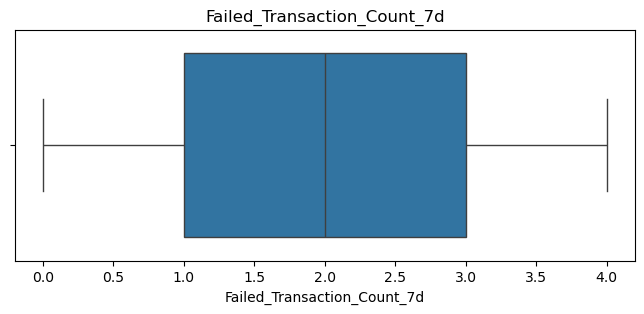

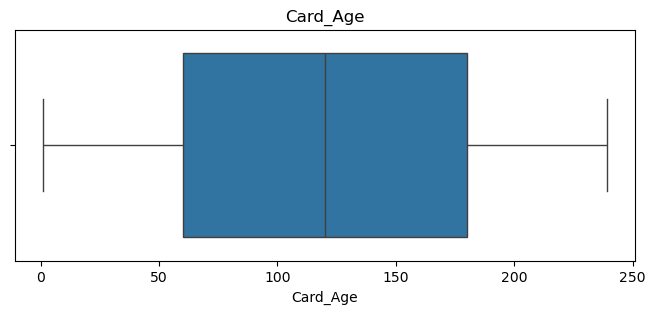

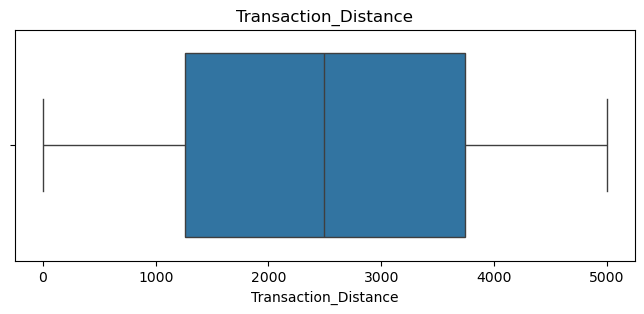

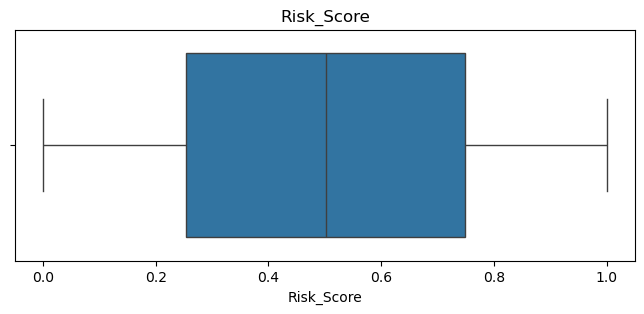

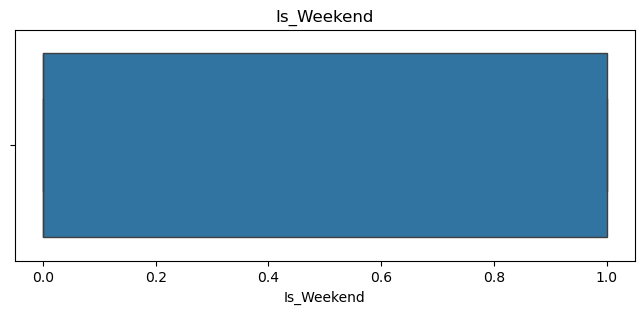

In [38]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('Fraud_Label')


df[num_cols].hist(figsize=(15,12), bins=30)
plt.show()


for col in num_cols:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


In [82]:
from scipy import stats


z_scores = stats.zscore(df[['Transaction_Amount', 'Transaction_Distance']])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).any(axis=1)
print(f"Number of outliers detected: {outliers.sum()}")





Number of outliers detected: 920


In [83]:
df = df[~outliers].reset_index(drop=True)
print(df.shape)  # This returns a tuple of (rows, columns)

(49080, 21)


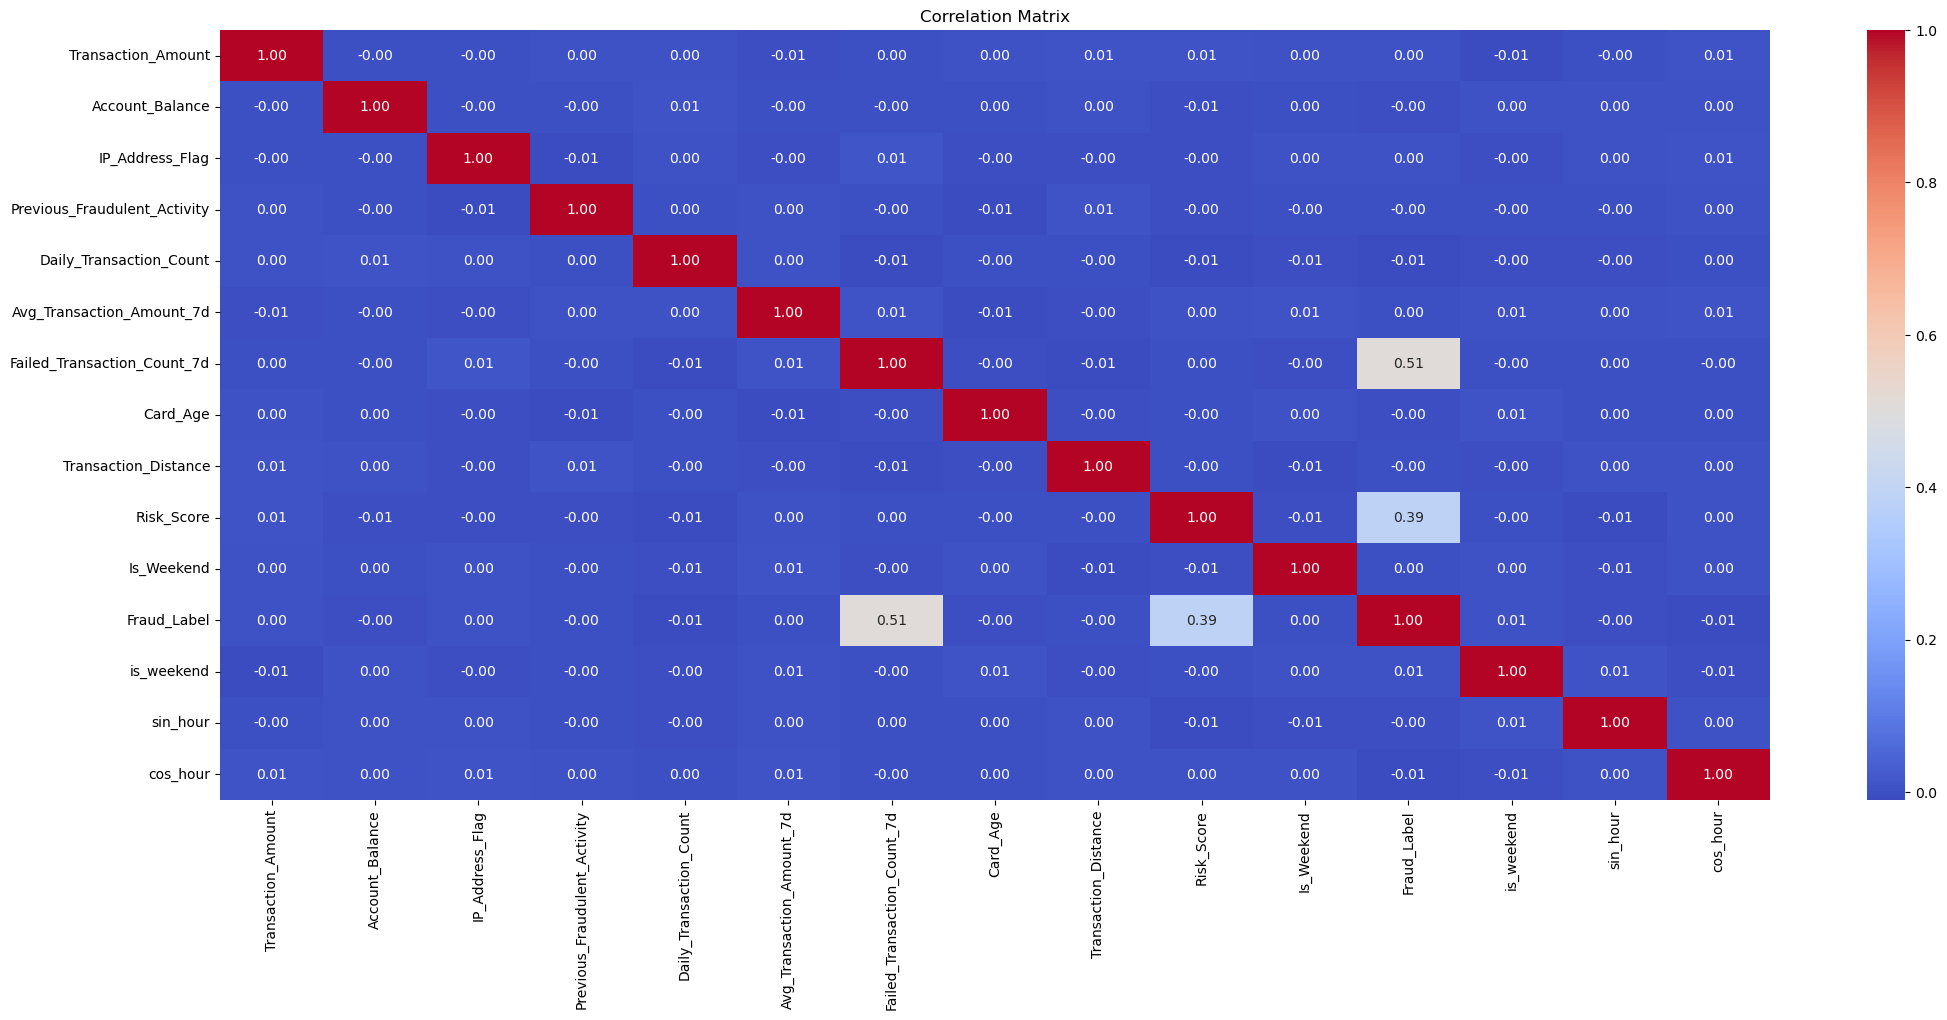

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(25,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [69]:
# First, identify and exclude non-numeric columns
numeric_df = df.select_dtypes(include=['number'])  # Keep only numeric columns

# Then calculate correlations using only numeric columns
correlations = numeric_df.corr()['Fraud_Label'].sort_values(ascending=False)

# Display the correlations
correlations

Fraud_Label                     1.000000
Failed_Transaction_Count_7d     0.509871
Risk_Score                      0.385810
IP_Address_Flag                 0.003028
Transaction_Amount              0.001901
Avg_Transaction_Amount_7d       0.000703
Is_Weekend                      0.000064
Transaction_Distance           -0.000116
Previous_Fraudulent_Activity   -0.000718
Card_Age                       -0.003120
Account_Balance                -0.003153
Daily_Transaction_Count        -0.007065
Name: Fraud_Label, dtype: float64

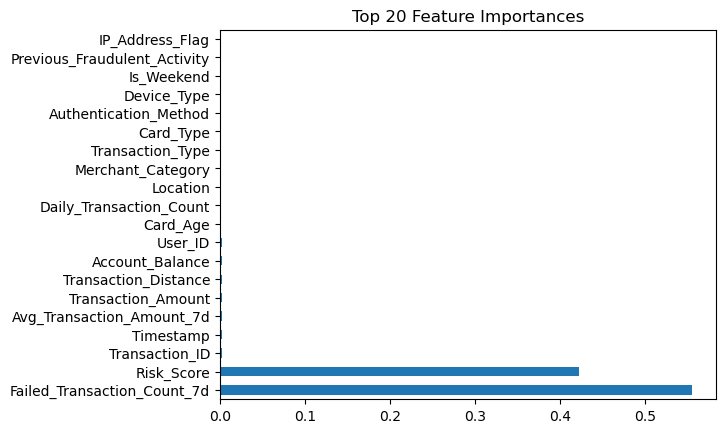

In [74]:
from sklearn.ensemble import RandomForestClassifier  # Changed to RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a copy of the dataframe to avoid modifying the original
X_processed = X.copy()

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert all categorical columns to numerical using LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    X_processed[col] = le.fit_transform(X[col])

# Train the model with processed data
model = RandomForestClassifier(random_state=42)  # Changed to RandomForestClassifier
model.fit(X_processed, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X_processed.columns)
importances.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title("Top 20 Feature Importances")
plt.show()

In [119]:
df.dtypes

Transaction_Amount              float64
Transaction_Type                 object
Account_Balance                 float64
Device_Type                      object
Location                         object
Merchant_Category                object
IP_Address_Flag                   int64
Previous_Fraudulent_Activity      int64
Daily_Transaction_Count           int64
Avg_Transaction_Amount_7d       float64
Failed_Transaction_Count_7d       int64
Card_Type                        object
Card_Age                          int64
Transaction_Distance            float64
Authentication_Method            object
Risk_Score                      float64
Is_Weekend                        int64
Fraud_Label                       int64
dtype: object

In [121]:

cols_to_drop = ['Transaction_ID', 'User_ID', 'Timestamp']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

cat_cols = df.select_dtypes(include=['object']).columns

encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)         # Ensure all values are strings
    df[col] = le.fit_transform(df[col])
    encoders[col] = le                    # store encoder for future use

print("✅ All categorical columns encoded successfully!")
print("Encoded categorical columns:", list(cat_cols))


✅ All categorical columns encoded successfully!
Encoded categorical columns: ['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 'Card_Type', 'Authentication_Method']


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split features and target
X = df.drop('Fraud_Label', axis=1)
y = df['Fraud_Label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Scale numeric columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0


In [127]:
X_train.dtype

dtype('float64')